In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../../datasets/DB_Total.csv')
df[:3]

,Unnamed: 0,_id,name,reviews,stars
0,0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.
1,1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.
2,2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.


In [3]:
# 필요없는 컬럼 삭제
df = df.drop(columns=['Unnamed: 0'], axis=1)
df[:5]

,_id,name,reviews,stars
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.


### 전처리

#### 결측치 처리

In [4]:
# 결측치 -> stars는 머신러닝 학습을 통해 예측 후 생성예정
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      2878 non-null   object
 1   name     2878 non-null   object
 2   reviews  2878 non-null   object
 3   stars    2118 non-null   object
dtypes: object(4)
memory usage: 90.1+ KB


In [5]:
df_reviews = df['reviews']
reviews_list = list(df_reviews)
reviews_list[:5]

['입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔이 아닌 어플에서 입장하기로 바뀌어 사용치 못 하고 있습니다. 매달 이용료는 나가고 있는 상황이면 고쳐지기 전까지 이용못했던 일자에 대해 보상처리는 되나요?어플을 지웠다 다시 다운 받아봐도 똑같은 상태입니다. 도대체 언제부터 전 사용 가능한가요?',
 '정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말 업뎃이후 문제임 둘. 은행도 아닌데 로그인 타임아웃 적용하나요? 어디까지 사용자 불편을 감수하면서 가실려고.. 셋.충분하게 Test하고 업뎃적용하시는지? 근래 며칠이 멀다 화면이 바뀌는데 순전 관리용이지 고객은 안중에도 없어보임 뭐에 쫒기듯 어설프다',
 '입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데이트 후에 매번 로그인 다시해야하고 위치 자동검색에 시설이 안나오고, 수동검색후 입장하는 기능도 없고 불편함만 늘었습니다. 덕분에 앱 여러번 삭제하고 다시까느라 애꿎은 데이타만 잔뜩쓰고 다시 예전 앱으로 돌아가고 싶습니다',
 '평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말 딱입니다! 제휴 업체도 꾸준히 추가되서 새로운 업체 방문하는게 요즘 낙이네요. 입장방식도 바코드에서 GPS로 바뀌면서 좀 더 편해지고 사용자편의적으로 개선이 되어가고 있어서 좋습니다. 앞으로도 좋은 제휴업체 많이 추가해주세요!!!!',
 '아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 사용지점이 많아서 출장이나 본가에 가게되도 지속적으로 쓸수있는점이 짱이예요! 라이프 코스도 같이 이용중인데 덕분에 카페이용비가 확 낮아졌어요 완전 대박 😀😀']

#### 형태소 분석

In [6]:
# from konlpy.tag import Komoran
# komoran = Komoran()
from mecab import MeCab
mecab = MeCab()

In [7]:
# 한 문장으로 만들기
reviews = ' '.join(reviews_list)
reviews

'입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔이 아닌 어플에서 입장하기로 바뀌어 사용치 못 하고 있습니다. 매달 이용료는 나가고 있는 상황이면 고쳐지기 전까지 이용못했던 일자에 대해 보상처리는 되나요?어플을 지웠다 다시 다운 받아봐도 똑같은 상태입니다. 도대체 언제부터 전 사용 가능한가요? 정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말 업뎃이후 문제임 둘. 은행도 아닌데 로그인 타임아웃 적용하나요? 어디까지 사용자 불편을 감수하면서 가실려고.. 셋.충분하게 Test하고 업뎃적용하시는지? 근래 며칠이 멀다 화면이 바뀌는데 순전 관리용이지 고객은 안중에도 없어보임 뭐에 쫒기듯 어설프다 입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데이트 후에 매번 로그인 다시해야하고 위치 자동검색에 시설이 안나오고, 수동검색후 입장하는 기능도 없고 불편함만 늘었습니다. 덕분에 앱 여러번 삭제하고 다시까느라 애꿎은 데이타만 잔뜩쓰고 다시 예전 앱으로 돌아가고 싶습니다 평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말 딱입니다! 제휴 업체도 꾸준히 추가되서 새로운 업체 방문하는게 요즘 낙이네요. 입장방식도 바코드에서 GPS로 바뀌면서 좀 더 편해지고 사용자편의적으로 개선이 되어가고 있어서 좋습니다. 앞으로도 좋은 제휴업체 많이 추가해주세요!!!! 아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 사용지점이 많아서 출장이나 본가에 가게되도 지속적으로 쓸수있는점이 짱이예요! 라이프 코스도 같이 이용중인데 덕분에 카페이용비가 확 낮아졌어요 완전 대박 😀😀 작년부터 계속 이용하고 있는 아이코젠, 정말 좋아요. 축 처져있는 여름날씨에도 운동하게 만들어줘요. 앱이 누구나 알아보기 쉽고 편리하게 되어 있어요. 이용내역을 통해 내가 언제 얼마나 이용했는지 정확하게 알 수 있어서 코로나로 힘든 시국에도 편리하고 안전하게 운동

In [8]:
# 토큰화
mecab.morphs(reviews)
# komoran.morphs(reviews)

['입장',
 '방식',
 '은',
 '변경',
 '됐',
 '는데',
 '어',
 '플',
 '은',
 '여전히',
 '바코드',
 '만',
 '보여집니다',
 '.',
 '짐',
 '에서',
 '는',
 '더',
 '이상',
 '바코드',
 '스캔',
 '이',
 '아닌',
 '어',
 '플',
 '에서',
 '입장',
 '하',
 '기',
 '로',
 '바뀌',
 '어',
 '사용',
 '치',
 '못',
 '하',
 '고',
 '있',
 '습니다',
 '.',
 '매달',
 '이용료',
 '는',
 '나가',
 '고',
 '있',
 '는',
 '상황',
 '이',
 '면',
 '고쳐',
 '지',
 '기',
 '전',
 '까지',
 '이',
 '용못',
 '했',
 '던',
 '일자',
 '에',
 '대해',
 '보상',
 '처리',
 '는',
 '되',
 '나요',
 '?',
 '어',
 '플',
 '을',
 '지웠',
 '다',
 '다시',
 '다운',
 '받',
 '아',
 '봐도',
 '똑같',
 '은',
 '상태',
 '입니다',
 '.',
 '도대체',
 '언제',
 '부터',
 '전',
 '사용',
 '가능',
 '한가요',
 '?',
 '정말',
 '답답',
 '하',
 '네요',
 '하나',
 '.',
 'GPS',
 '100',
 '프로',
 '신뢰',
 '하',
 '나요',
 '?',
 '시설',
 '선택',
 '목록',
 '에서',
 '안',
 '보임',
 '4',
 '월',
 '말',
 '업',
 '뎃',
 '이후',
 '문제',
 '임',
 '둘',
 '.',
 '은행',
 '도',
 '아닌데',
 '로그인',
 '타임아웃',
 '적용',
 '하',
 '나요',
 '?',
 '어디',
 '까지',
 '사용',
 '자',
 '불편',
 '을',
 '감수',
 '하',
 '면서',
 '가',
 '실려고',
 '.',
 '.',
 '셋',
 '.',
 '충분',
 '하',
 '게',
 'Test',
 '하',
 '고',
 '업',
 

In [9]:
# 품사달기
morphs = mecab.pos(reviews)
morphs

[('입장', 'NNG'),
 ('방식', 'NNG'),
 ('은', 'JX'),
 ('변경', 'NNG'),
 ('됐', 'XSV+EP'),
 ('는데', 'EC'),
 ('어', 'IC'),
 ('플', 'NNG'),
 ('은', 'JX'),
 ('여전히', 'MAG'),
 ('바코드', 'NNG'),
 ('만', 'JX'),
 ('보여집니다', 'VV+EC+VX+EF'),
 ('.', 'SF'),
 ('짐', 'NNG'),
 ('에서', 'JKB'),
 ('는', 'JX'),
 ('더', 'MAG'),
 ('이상', 'NNG'),
 ('바코드', 'NNG'),
 ('스캔', 'NNP'),
 ('이', 'JKC'),
 ('아닌', 'VCN+ETM'),
 ('어', 'IC'),
 ('플', 'NNG'),
 ('에서', 'JKB'),
 ('입장', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('로', 'JKB'),
 ('바뀌', 'VV'),
 ('어', 'EC'),
 ('사용', 'NNG'),
 ('치', 'XSN'),
 ('못', 'MAG'),
 ('하', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('매달', 'MAG'),
 ('이용료', 'NNG'),
 ('는', 'JX'),
 ('나가', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('는', 'ETM'),
 ('상황', 'NNG'),
 ('이', 'VCP'),
 ('면', 'EC'),
 ('고쳐', 'VV+EC'),
 ('지', 'VX'),
 ('기', 'ETN'),
 ('전', 'NNG'),
 ('까지', 'JX'),
 ('이', 'MM'),
 ('용못', 'NNG'),
 ('했', 'XSV+EP'),
 ('던', 'ETM'),
 ('일자', 'NNG'),
 ('에', 'JKB'),
 ('대해', 'VV+EC'),
 ('보상', 'NNG'),
 ('처리', 'NNG'),
 ('는'

In [10]:
# 토큰화 함수
def tokenize_reviews_list(reviews):
    tokens = mecab.morphs(reviews)
    return ' '.join(tokens)

In [11]:
df['tokenized_review'] = df['reviews'].apply(tokenize_reviews_list)

In [12]:
df[:5]

,_id,name,reviews,stars,tokenized_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...


In [13]:
df['tokenized_review'][0]

'입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는 더 이상 바코드 스캔 이 아닌 어 플 에서 입장 하 기 로 바뀌 어 사용 치 못 하 고 있 습니다 . 매달 이용료 는 나가 고 있 는 상황 이 면 고쳐 지 기 전 까지 이 용못 했 던 일자 에 대해 보상 처리 는 되 나요 ? 어 플 을 지웠 다 다시 다운 받 아 봐도 똑같 은 상태 입니다 . 도대체 언제 부터 전 사용 가능 한가요 ?'

#### 자연어 전처리

##### 유사어 대치

In [14]:
df_replacewords = pd.read_excel('../../datasets/replace_concat.xlsx')
df_replacewords[:5]

,before_replacement,after_replacement
0,선생님,강사님
1,샘,강사님
2,쌤,강사님
3,로긴,로그인
4,ㅡㅡ,별로에요


In [15]:
# 유사어 대치 함수
def replace_word(tokenized_review):
    replaced_review = tokenized_review #초기값 설정
    for i in range(len(df_replacewords['before_replacement'])):
        try:
            # 치환할 단어 있는 경우에만 데이터 치환 수행
            # if type(replaced_review) == str and df_replacewords['before_replacement'][i] in replaced_review:
            if df_replacewords['before_replacement'][i] in replaced_review:
                replaced_review = replaced_review.replace(df_replacewords['before_replacement'][i], df_replacewords['after_replacement'][i])
            # 치환할 단어가 없는 경우에는 그대로 뱉어냄
        except Exception as e:
            # print(f"Error 발생 / 에러명: {e}")
            pass
    return replaced_review

In [16]:
# 확인
replace_word('수영장 매장 샘 쌤 선생님 입장 방식 은 변경 됐 는데 앱은 여전히 바코드 만 보여집니다 . 짐 에서 는 더 이상 바코드 스캔 이 아닌 어 플 에서 입장 하 기 로 바뀌 어 사용 치 못 하 고 있 습니다 . 매달 이용료 는 나가 고 있 는 상황 이 면 고쳐 지 기 전 까지 이 용못 했 던 일자 에 대해 보상 처리 는 되 나요 ? 어 플 을 지웠 다 다시 다운 받 아 봐도 똑같 은 상태 입니다 . 도대체 언제 부터 전 사용 가능 한가요 ?')

'운동시설 운동시설 강사님 강사님 강사님 입장 방식 은 수정 됐 는데 사이트은 여전히 바코드 만 보여집니다 . 운동시설 에서 는 더 이상 바코드 스캔 이 아닌 어 플 에서 입장 하 기 로 바뀌 어 사용 치 못 하 고 있 습니다 . 매달 사용료 는 나가 고 있 는 상황 이 면 고쳐 지 기 전 까지 이 용못 했 던 일자 에 대해 보상 처리 는 되 나요 ? 어 플 을 지웠 다 다시 다운 받 아 봐도 똑같 은 상태 입니다 . 도대체 언제 부터 전 사용 가능 한가요 ?'

In [17]:
df['replaced_review'] = df['tokenized_review'].apply(replace_word)
df[:3]

,_id,name,reviews,stars,tokenized_review,replaced_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...


##### 불용어 처리와 한단어 처리

In [18]:
# 불용어 사전 불러오기
df_stopwords = pd.read_excel('../../datasets/stopword_concat.xlsx')
df_stopwords[:5]

,stopword
0,가
1,가까스로
2,가량
3,가령
4,가민


In [19]:
# 한단어 사전 불러오기
df_onewords = pd.read_excel('../../datasets/oneword_concat.xlsx')
df_onewords[:5]

,one_char_keyword
0,값
1,꿀
2,꿈
3,끝
4,날


In [20]:
words = ' '.join(df['replaced_review'])
words

'입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에서 는 더 이상 바코드 스캔 이 아닌 어 플 에서 입장 하 기 로 바뀌 어 사용 치 못 하 고 있 습니다 . 매달 사용료 는 나가 고 있 는 상황 이 면 고쳐 지 기 전 까지 이 용못 했 던 일자 에 대해 보상 처리 는 되 나요 ? 어 플 을 지웠 다 다시 다운 받 아 봐도 똑같 은 상태 입니다 . 도대체 언제 부터 전 사용 가능 한가요 ? 정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 에서 안 보임 4 월 말 업 뎃 이후 문제 임 둘 . 은행 도 아닌데 로그인 타임아웃 적용 하 나요 ? 어디 까지 사용 자 불편 을 감수 하 면서 가 실려고 . . 셋 . 충분 하 게 Test 하 고 업 뎃 적용 하 시 는지 ? 근래 며칠 이 멀 다 화면 이 바뀌 는데 순전 관리 용 이 지 고객 은 안중 에 도 없 어 보임 뭐 에 쫒기 듯 어설프 다 입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 에 잘 쓰 던 사이트 이 개선 후 에 매번 로그인 다시 해야 하 고 위치 자동 검색 에 시설 이 안 나오 고 , 수동 검색 후 입장 하 는 기능 도 없 고 불편 함 만 늘 었 습니다 . 덕분 에 사이트 여러 번 삭제 하 고 다시 까 느라 애꿎 은 데 이타 만 잔뜩 쓰 고 다시 예전 사이트 으로 돌아가 고 싶 습니다 평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합리 적 인 아이 코젠 이 정말 딱 입니다 ! 제휴 업체 도 꾸준히 추가 되 서 새로운 업체 방문 하 는 게 요즘 낙 이 네요 . 입장 방식 도 바코드 에서 GPS 로 바뀌 면서 좀 더 편해 지 고 사용 자 편의 적 으로 개선 이 되 어 가 고 있 어서 좋 습니다 . 앞 으로 도 좋 은 제휴 업체 많이 추가 해 주 세요 ! !!! 아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 기록 이 꼼꼼히 남 고 사용 지점

In [21]:
stopwords = df_stopwords['stopword'].values
onewords = df_onewords['one_char_keyword'].values

from konlpy.tag import Okt
okt = Okt()
# 불용어, 한단어 처리 함수
def remove_words(raw, pos=["Noun",'Adjective',"Alpha","Verb","Number"], stopword=stopwords):
    result_list = list()
    for word, tag in okt.pos(raw, norm=True, stem=True) :
        if len(word) > 1 and tag in pos and word not in stopword:
            result_list.append(word)
        elif len(word) == 1 and word in onewords:
            result_list.append(word)
    return ' '.join(result_list)

In [22]:
# 확인
remove_words('값 꿀 꿈 끝 날 거니와 개의치않고 가 가까스로 가령 가민 개의치않고 정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 에서 안 보임 4 월 말 업 뎃 이후 문제 임 둘 . 은행 도 아닌데 로그인 타임아웃 적용 하 나요 ? 어디 까지 사용 자 불편 을 감수 하 면서 가 실려고 . . 셋 . 충분 하 게 Test 하 고 업 뎃 적용 하 시 는지 ? 근래 며칠 이 멀 다 화면 이 바뀌 는데 순전 관리 용 이 지 고객 은 안중 에 도 없 어 보임 뭐 에 쫒기 듯 어설프 다')

'값 꿀 꿈 끝 날 의치 않다 의치 않다 답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 아웃 적용 불편 감수 면서 실리다 충분 Test 적용 근래 멀다 화면 바뀌다 관리 고객 안중 없다 보임 쫒다 어설프다'

In [23]:
# df['replaced_review'] = df['tokenized_review'].apply(replace_word)
df['preprocess_review'] = df['replaced_review'].apply(remove_words)
df[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 잦다 여러 장소 운동 늘다 좋다 늘다 늘다 합리 코젠 제휴 업체 꾸준하다 추가...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,덕분 운동 더 즐겁다 꾸다 기록 꼼꼼하다 지점 많다 출장 본가 지속 쓸다 수 늘다 ...


In [24]:
# 문장 합치기
text = ' '.join(list(df['preprocess_review']))
text[:10]  

'입장 방식 수정 돼'

In [25]:
# split 후 단어로 구성된 list 생성
text_split = text.split()
text_split[:5]

['입장', '방식', '수정', '돼다', '여전하다']

In [26]:
# 객체의 개수를 세는 데 사용(딕셔너리 형태로 반환)
from collections import Counter
Counter(text_split)

Counter({'입장': 76,
         '방식': 9,
         '수정': 23,
         '돼다': 54,
         '여전하다': 1,
         '보이다': 28,
         '운동': 857,
         '시설': 698,
         '늘다': 1076,
         '더': 209,
         '스캔': 2,
         '아니다': 123,
         '바뀌다': 26,
         '나가다': 15,
         '상황': 6,
         '고치다': 10,
         '용다': 8,
         '일자': 3,
         '대해': 11,
         '보상': 14,
         '처리': 10,
         '지우다': 12,
         '똑같다': 3,
         '상태': 26,
         '도대체': 8,
         '가능': 120,
         '답답': 4,
         'GPS': 11,
         '100': 5,
         '프로': 10,
         '신뢰': 5,
         '선택': 32,
         '목록': 3,
         '보임': 5,
         '문제': 34,
         '은행': 1,
         '로그인': 92,
         '타임': 1,
         '아웃': 1,
         '적용': 13,
         '불편': 94,
         '감수': 1,
         '면서': 65,
         '실리다': 1,
         '충분': 3,
         'Test': 1,
         '근래': 1,
         '멀다': 15,
         '화면': 85,
         '관리': 66,
         '고객': 29,
         '안중': 1,
         '없다

In [27]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

from wordcloud import WordCloud
wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_text(text)

In [28]:
wordCloud.words_

{'늘다': 1.0,
 '좋다': 0.6480874316939891,
 '사이트': 0.4131147540983607,
 '헬스': 0.4087431693989071,
 '운동 시설': 0.38579234972677595,
 '운동': 0.32786885245901637,
 '좋다 좋다': 0.2710382513661202,
 '없다': 0.26229508196721313,
 '개선': 0.23278688524590163,
 '수 좋다': 0.21092896174863388,
 '편리': 0.17486338797814208,
 '편하다': 0.1737704918032787,
 '않다': 0.17158469945355193,
 '다니다': 0.1540983606557377,
 '많다': 0.14207650273224043,
 '결제': 0.14207650273224043,
 '더': 0.13989071038251366,
 '가격': 0.13224043715846995,
 '가능': 0.13114754098360656,
 '좋다 운동': 0.12568306010928962,
 '오류': 0.12349726775956284,
 '등록': 0.12021857923497267,
 '추천': 0.11038251366120219,
 '아니다': 0.10491803278688525,
 '계속': 0.10382513661202186,
 '불편': 0.10273224043715846,
 '정보': 0.10163934426229508,
 '끄다': 0.1005464480874317,
 '수 늘다': 0.09617486338797815,
 '다양': 0.09508196721311475,
 '회원 가입': 0.09398907103825137,
 '시설 박스': 0.08852459016393442,
 '지역': 0.08743169398907104,
 '수': 0.08633879781420765,
 '회원': 0.08524590163934426,
 '제휴': 0.0841530054644

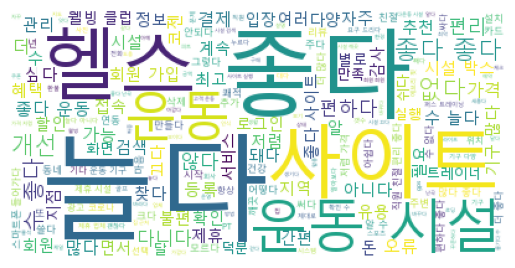

In [29]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') # plt 옵션 : 축 없애기
plt.show()

#### 머신러닝 학습 후 목표변수 생성
- nan이 있는 데이터와 없는 데이터 분류
- nan이 없는 데이터로 머신러닝 학습
- nan이 있는 데이터 값 채우기

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                2878 non-null   object
 1   name               2878 non-null   object
 2   reviews            2878 non-null   object
 3   stars              2118 non-null   object
 4   tokenized_review   2878 non-null   object
 5   replaced_review    2878 non-null   object
 6   preprocess_review  2878 non-null   object
dtypes: object(7)
memory usage: 157.5+ KB


In [31]:
# 데이터 분류하기
# NaN이 있는 데이터 추출
df_with_nan = df[df['stars'].isna()]

# NaN이 없는 데이터 추출
df_without_nan = df[df['stars'].notna()]

In [32]:
df_with_nan[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review
2118,651277e7ddb81e8e96c6c501,Party Saurus Rex,"헬스장과 어플의 수익분배가 어떻게 되는지는 모르겠는데, 다짐어플로 통합회원권 끊고 ...",NaN,"헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 짐 ...","헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 운동...",헬스 수익 분배 어떻다 늘다 모르다 운동 시설 통합 회원 끊다 헬스 회원 아니다 이...
2119,651277e7ddb81e8e96c6c502,cha park,운동을 좋아하는사람에겐 최고입니다! 너무 잘 사용하고있어 단점이라기보단 이런점이 있...,NaN,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 좋아하다 늘다 최고 단점 더 좋다 남기다 통합 회원 선택 추천 시설 카테고리 ...
2120,651277e7ddb81e8e96c6c503,박나래,오랜만에 헬스장에서 운동하고 싶은 생각에 막연하게 인터넷에 쳐보기도하고 번거롭게 전...,NaN,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,헬스 운동 싶다 막연 인터넷 치다 번거 전화 가격 요구 직접 이야기 부족 맞춤 합리...
2121,651277e7ddb81e8e96c6c504,조정호,1.강원도 원주시 단구동에 하나도 없어서 제가 헬스장이랑 수영장 하나 시설등록요청 ...,NaN,1 . 강원도 원주시 단구동 에 하나 도 없 어서 제 가 헬스 장이 랑 수영장 하나...,1 . 강원도 원주시 단구동 에 하나 도 없 어서 제 가 헬스 장이 랑 운동시설 하...,강원도 원주시 단구동 없다 헬스 운동 시설 시설 등록 요청 운동 시설 없다 늘다 단...
2122,651277e7ddb81e8e96c6c505,정희정,"추천 ☆×5 !! 운동시작 전에 무조건 깔아야하는 어플! 헬스장 등록할때 거리,가격...",NaN,추천 ☆ × 5 ! ! 운동 시작 전 에 무조건 깔 아야 하 는 어 플 ! 헬스 장...,추천 ☆ × 5 ! ! 운동 시작 전 에 무조건 깔 아야 하 는 어 플 ! 헬스 장...,추천 운동 시작 무조건 늘다 헬스 등록 거리 가격 트레이너 정보 가장 중요 확인 늘...


In [33]:
df_without_nan[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 잦다 여러 장소 운동 늘다 좋다 늘다 늘다 합리 코젠 제휴 업체 꾸준하다 추가...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,덕분 운동 더 즐겁다 꾸다 기록 꼼꼼하다 지점 많다 출장 본가 지속 쓸다 수 늘다 ...


In [34]:
df_without_nan_stars = df_without_nan['stars']
stars_list = df_without_nan_stars.tolist()
stars_list[:10]

['별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 2개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.']

##### 정규표현식을 사용하여 뒤에 있는 숫자 추출

In [35]:
import re

rating_list = list()
for stars in stars_list:
    numbers = re.findall(r'\d+', str(stars))  # 정규표현식을 사용하여 숫자만 추출
    if numbers :
        rating = int(numbers[-1])   # 추출된 숫자 중 마지막 요소인 문자열 형태의 숫자를 정수로 변환
        rating_list.append(rating)
rating_list[:5]

[1, 1, 1, 5, 5]

In [36]:
df_without_nan_rating = pd.DataFrame(data=rating_list, columns=['rating'])
df_without_nan_rating[:3]

,rating
0,1
1,1
2,1


##### 병합

In [37]:
df_without_nan = pd.concat([df_without_nan, df_without_nan_rating], axis=1)
df_without_nan[:3]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review,rating
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...,1
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...,1
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1


##### rating(별점)에 따른 긍정, 부정 댓글 분리

In [38]:
import numpy as np

df_without_nan['classification'] = np.where(df_without_nan['rating'] >= 3, '긍정', '부정')
df_without_nan[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review,rating,classification
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...,1,부정
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...,1,부정
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1,부정
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 잦다 여러 장소 운동 늘다 좋다 늘다 늘다 합리 코젠 제휴 업체 꾸준하다 추가...,5,긍정
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,덕분 운동 더 즐겁다 꾸다 기록 꼼꼼하다 지점 많다 출장 본가 지속 쓸다 수 늘다 ...,5,긍정


##### 벡터 토큰화(단어 숫자화)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [40]:
reviews_list = list(df_without_nan['reviews'])
reviews_list[:5]

['입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔이 아닌 어플에서 입장하기로 바뀌어 사용치 못 하고 있습니다. 매달 이용료는 나가고 있는 상황이면 고쳐지기 전까지 이용못했던 일자에 대해 보상처리는 되나요?어플을 지웠다 다시 다운 받아봐도 똑같은 상태입니다. 도대체 언제부터 전 사용 가능한가요?',
 '정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말 업뎃이후 문제임 둘. 은행도 아닌데 로그인 타임아웃 적용하나요? 어디까지 사용자 불편을 감수하면서 가실려고.. 셋.충분하게 Test하고 업뎃적용하시는지? 근래 며칠이 멀다 화면이 바뀌는데 순전 관리용이지 고객은 안중에도 없어보임 뭐에 쫒기듯 어설프다',
 '입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데이트 후에 매번 로그인 다시해야하고 위치 자동검색에 시설이 안나오고, 수동검색후 입장하는 기능도 없고 불편함만 늘었습니다. 덕분에 앱 여러번 삭제하고 다시까느라 애꿎은 데이타만 잔뜩쓰고 다시 예전 앱으로 돌아가고 싶습니다',
 '평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말 딱입니다! 제휴 업체도 꾸준히 추가되서 새로운 업체 방문하는게 요즘 낙이네요. 입장방식도 바코드에서 GPS로 바뀌면서 좀 더 편해지고 사용자편의적으로 개선이 되어가고 있어서 좋습니다. 앞으로도 좋은 제휴업체 많이 추가해주세요!!!!',
 '아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 사용지점이 많아서 출장이나 본가에 가게되도 지속적으로 쓸수있는점이 짱이예요! 라이프 코스도 같이 이용중인데 덕분에 카페이용비가 확 낮아졌어요 완전 대박 😀😀']

In [41]:
# 교육(학습)
countVectorizer = CountVectorizer()
countVectorizer.fit(reviews_list)

CountVectorizer()

In [42]:
countVectorizer.vocabulary_

{'입장방식은': 6903,
 '변경됐는데': 3543,
 '어플은': 5559,
 '여전히': 5812,
 '바코드만': 3365,
 '보여집니다': 3627,
 '짐에서는': 8009,
 '더이상': 2164,
 '바코드스캔이': 3370,
 '아닌': 4967,
 '어플에서': 5556,
 '입장하기로': 6917,
 '바뀌어': 3330,
 '사용치': 4008,
 '하고': 8934,
 '있습니다': 6972,
 '매달': 2880,
 '이용료는': 6594,
 '나가고': 1564,
 '있는': 6943,
 '상황이면': 4182,
 '고쳐지기': 1026,
 '전까지': 7301,
 '이용못했던': 6601,
 '일자에': 6859,
 '대해': 2147,
 '보상처리는': 3602,
 '되나요': 2304,
 '어플을': 5560,
 '지웠다': 7892,
 '다시': 1976,
 '다운': 2023,
 '받아봐도': 3407,
 '똑같은': 2538,
 '상태입니다': 4168,
 '도대체': 2186,
 '언제부터': 5586,
 '사용': 3939,
 '가능한가요': 428,
 '정말': 7406,
 '답답하네요': 2093,
 '하나': 8945,
 'gps': 264,
 '100프로': 6,
 '신뢰하나요': 4724,
 '시설선택목록에서': 4641,
 '안보임': 5191,
 '4월말': 186,
 '업뎃이후': 5662,
 '문제임': 3222,
 '은행도': 6424,
 '아닌데': 4970,
 '로그인': 2598,
 '타임아웃': 8635,
 '적용하나요': 7276,
 '어디까지': 5465,
 '사용자': 3986,
 '불편을': 3771,
 '감수하면서': 590,
 '가실려고': 480,
 '충분하게': 8408,
 'test하고': 309,
 '업뎃적용하시는지': 5663,
 '근래': 1292,
 '며칠이': 3003,
 '멀다': 2963,
 '화면이': 9486,
 '바뀌는데': 3327,
 '순전': 4501,

In [43]:
tfidfVectorizer = TfidfVectorizer(use_idf=True)
tfidfVectorizer.fit(reviews_list) # 2차원 배열로 교육

TfidfVectorizer()

In [44]:
tfidfVectorizer.idf_

array([7.96555238, 7.96555238, 7.96555238, ..., 7.96555238, 7.56008727,
       7.96555238])

In [45]:
# 벡터화
features = tfidfVectorizer.transform(reviews_list) # 학습 시 2차원 이용했으므로 변환도 2차원 적용
features

<2118x9716 sparse matrix of type '<class 'numpy.float64'>'
	with 20489 stored elements in Compressed Sparse Row format>

##### 목표변수 생성

In [46]:
target = list(df_without_nan['classification'])
target[:5]

['부정', '부정', '부정', '긍정', '긍정']

##### 머신러닝 학습

In [47]:
from sklearn.svm import SVC

In [48]:
model = SVC()
model.fit(features, target)

SVC()

##### 머신러닝을 통한 예측

In [49]:
df_with_nan_review = df_with_nan['preprocess_review']

In [50]:
features_with_nan_review = tfidfVectorizer.transform(df_with_nan_review)
features_with_nan_review

<760x9716 sparse matrix of type '<class 'numpy.float64'>'
	with 2761 stored elements in Compressed Sparse Row format>

In [51]:
model.predict(features_with_nan_review)

array(['긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정',
       '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '부정', '긍정',
       '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부

In [52]:
df_with_nan['classification'] = model.predict(features_with_nan_review)
df_with_nan[:5]

C:\Users\koreavc\AppData\Local\Temp\ipykernel_13196\588398450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nan['classification'] = model.predict(features_with_nan_review)


,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review,classification
2118,651277e7ddb81e8e96c6c501,Party Saurus Rex,"헬스장과 어플의 수익분배가 어떻게 되는지는 모르겠는데, 다짐어플로 통합회원권 끊고 ...",NaN,"헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 짐 ...","헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 운동...",헬스 수익 분배 어떻다 늘다 모르다 운동 시설 통합 회원 끊다 헬스 회원 아니다 이...,긍정
2119,651277e7ddb81e8e96c6c502,cha park,운동을 좋아하는사람에겐 최고입니다! 너무 잘 사용하고있어 단점이라기보단 이런점이 있...,NaN,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 좋아하다 늘다 최고 단점 더 좋다 남기다 통합 회원 선택 추천 시설 카테고리 ...,긍정
2120,651277e7ddb81e8e96c6c503,박나래,오랜만에 헬스장에서 운동하고 싶은 생각에 막연하게 인터넷에 쳐보기도하고 번거롭게 전...,NaN,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,헬스 운동 싶다 막연 인터넷 치다 번거 전화 가격 요구 직접 이야기 부족 맞춤 합리...,긍정
2121,651277e7ddb81e8e96c6c504,조정호,1.강원도 원주시 단구동에 하나도 없어서 제가 헬스장이랑 수영장 하나 시설등록요청 ...,NaN,1 . 강원도 원주시 단구동 에 하나 도 없 어서 제 가 헬스 장이 랑 수영장 하나...,1 . 강원도 원주시 단구동 에 하나 도 없 어서 제 가 헬스 장이 랑 운동시설 하...,강원도 원주시 단구동 없다 헬스 운동 시설 시설 등록 요청 운동 시설 없다 늘다 단...,긍정
2122,651277e7ddb81e8e96c6c505,정희정,"추천 ☆×5 !! 운동시작 전에 무조건 깔아야하는 어플! 헬스장 등록할때 거리,가격...",NaN,추천 ☆ × 5 ! ! 운동 시작 전 에 무조건 깔 아야 하 는 어 플 ! 헬스 장...,추천 ☆ × 5 ! ! 운동 시작 전 에 무조건 깔 아야 하 는 어 플 ! 헬스 장...,추천 운동 시작 무조건 늘다 헬스 등록 거리 가격 트레이너 정보 가장 중요 확인 늘...,긍정


##### 최종 병합
- pd.concat()을 사용하여 행 또는 열 방향으로 데이터프레임 결합
    - 행 방향 결합 : pd.concat([df1, df2], axis=0)
    - 열 방향 결합 : pd.concat([df1, df2], axis=1)

In [57]:
df_total_data = pd.concat([df_without_nan, df_with_nan], axis=0)
df_total_data[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review,rating,classification
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...,1.0,부정
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...,1.0,부정
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1.0,부정
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 잦다 여러 장소 운동 늘다 좋다 늘다 늘다 합리 코젠 제휴 업체 꾸준하다 추가...,5.0,긍정
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,덕분 운동 더 즐겁다 꾸다 기록 꼼꼼하다 지점 많다 출장 본가 지속 쓸다 수 늘다 ...,5.0,긍정


In [54]:
df_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2878 entries, 0 to 2877
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                2878 non-null   object 
 1   name               2878 non-null   object 
 2   reviews            2878 non-null   object 
 3   stars              2118 non-null   object 
 4   tokenized_review   2878 non-null   object 
 5   replaced_review    2878 non-null   object 
 6   preprocess_review  2878 non-null   object 
 7   rating             2118 non-null   float64
 8   classification     2878 non-null   object 
dtypes: float64(1), object(8)
memory usage: 224.8+ KB


In [55]:
df_total_data.to_csv('../../datasets/total_data.csv')